In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
X,y = sklearn.datasets.make_moons(200, noise=0.15)

In [3]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

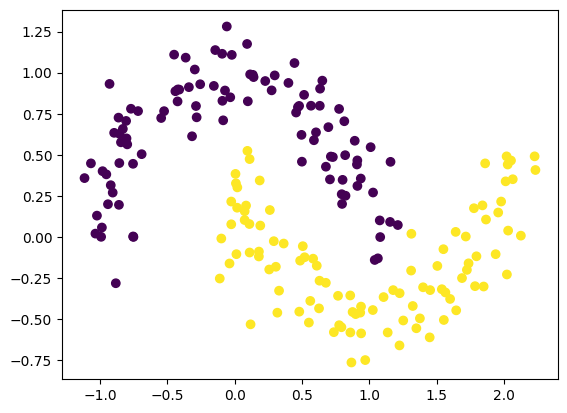

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
X.shape

(200, 2)

In [6]:
## Hyperparameters
input_neurons = 2   # number of input neurons
output_neurons = 2 # binary classification
samples = X.shape[0] # number of samples
learning_rate = 0.001 # learning rate
lambda_reg = 0.01 # regularization parameter

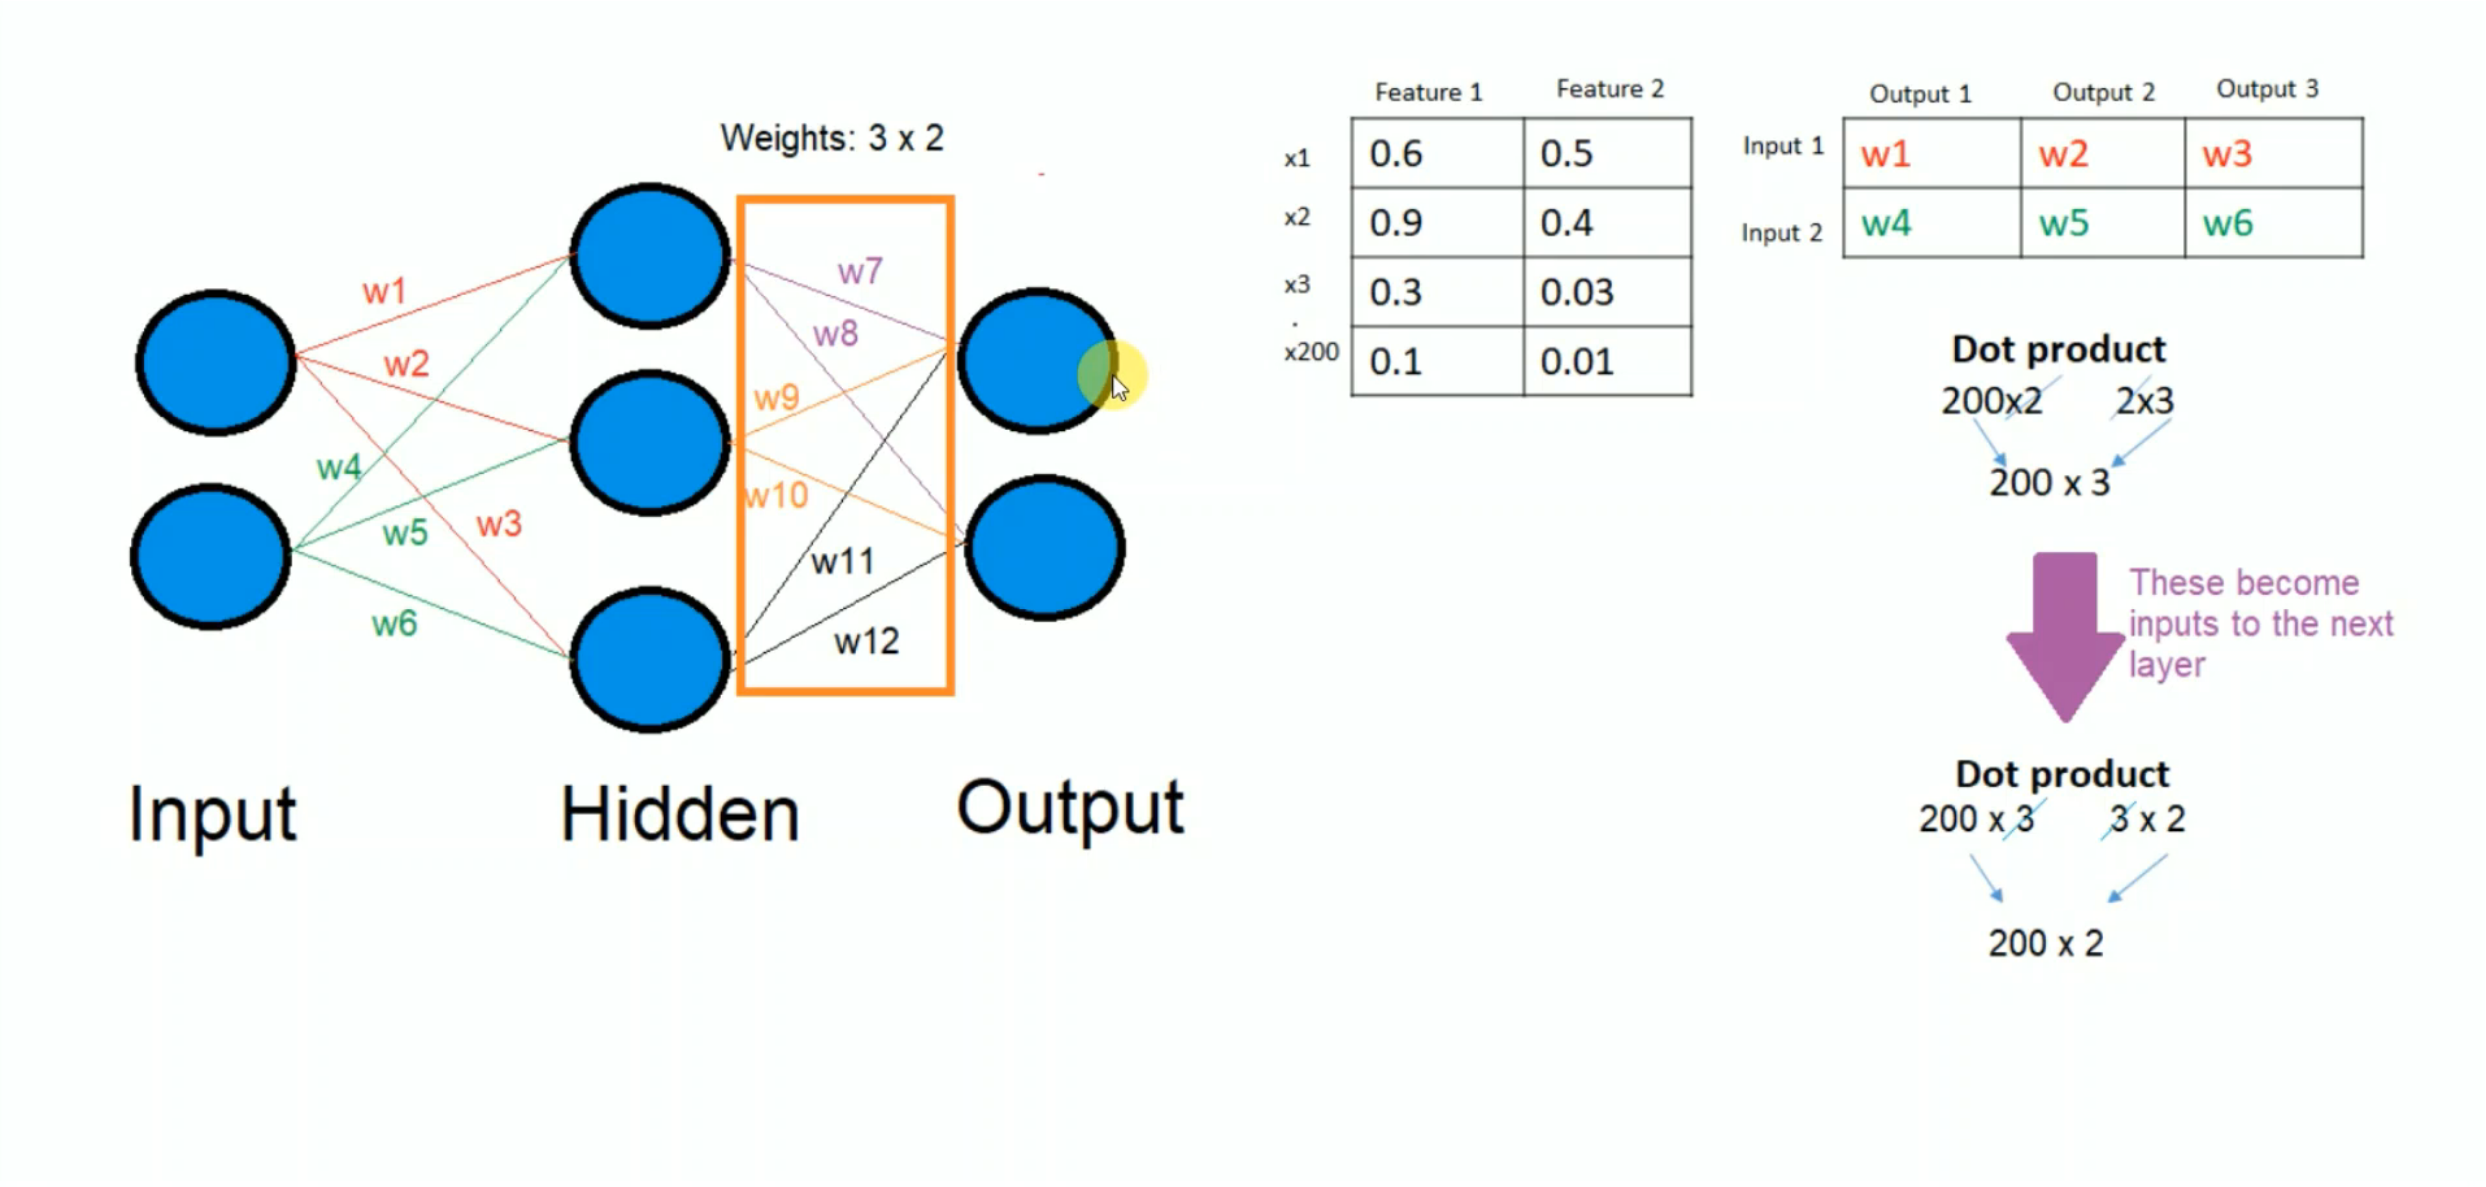

In [7]:
model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

NameError: name 'W1' is not defined

In [ ]:
def retreive(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1,b1,W2,b2

In [ ]:
def forward(x, model_dict):
    W1,b1,W2,b2 = retreive(model_dict)
    z1 = np.dot(x,W1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return softmax

In [ ]:
def loss(softmax, y):
    W1, b1, W2, b2 = retreive(model_dict)
    m = np.zeros(200)
    for i, correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(predicted)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss += reg_loss
    return float(loss / y.shape[0])

In [ ]:
def predict(x, model_dict):
    W1,b1,W2,b2 = retreive(model_dict)
    z1 = np.dot(x,W1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(softmax, axis=1)

#### $\frac{\partial L}{\partial y_{1}}=-\tilde{y}_{1}\left[\frac{\left(y_{1}\right)^{\prime}}{y_{1}}\right]=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]$

#### $\frac{\partial y_{1}}{\partial z_{1}}=\frac{\partial}{\partial z_{1}} \cdot \frac{e^{z_{1}}}{e^{z_{1}}+e^{z_{2}}+e^{z_{3}}}$

![der](https://user-images.githubusercontent.com/46392773/56460220-ec94cc00-63d1-11e9-91d1-b4e3c57c81fd.png)

#### $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]\frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{y_{1}\left(1-y_{1}\right)}{y_{1}}\right]=-\tilde{y}_{1}\left(1-y_{1}\right)$

Recall that our labels are in the form of a one-hot vector: (ex. If class 1 is correct, then the corresponding label is [1,0], if class 2 is correct, then the corresponding label is [0,1]).

If class one is the actual prediction: $\tilde{y}_{1} = 1 $, then we have:

#### $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}} = -1(1-y_{1}) = y_{1} - 1 = \delta_{3}$

#### $\delta_{2}=\left(1-\tanh ^{2} z_{1}\right) \circ \delta_{3} W_{2}^{T}$

#### $\frac{\partial L}{\partial W_{2}}=a_{1}^{T} \delta_{3}$

#### $\frac{\partial L}{\partial b_{2}}=\delta_{3}$

#### $\frac{\partial L}{\partial W_{1}}=x^{T} \delta 2$

#### $\frac{\partial L}{\partial b_{1}}=\delta 2$

In [ ]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1,b1,W2,b2 = retreive(model_dict)
        z1, a1, probs = forward(x, model_dict)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1 # (200,2) delta3 = probs - 1
        dW2 = (a1.T).dot(delta3) # a1: (3, 200) delta3: (200, 2) dW2: (3, 2)
        db2 = np.sum(delta3, axis=0, keepdims=True) # (1, 2)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2)  
        dW1 += lambda_reg * np.sum(W1)  
        # Update Weights: W = W + (-lr*gradient) = W - lr*gradient
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Print the loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs, y, model_dict)))
            
    return model_dict